In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 10,6

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("Electric_Production.csv")

In [3]:
df.shape

(397, 2)

In [4]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'],infer_datetime_format=True)
df = df.set_index(['DATE'])
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


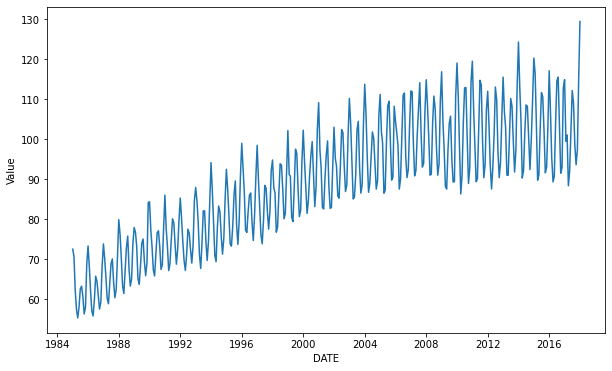

In [6]:
#Plot graph
plt.xlabel("DATE")
plt.ylabel("Value")
plt.plot(df)

In [7]:
#determining rolling statistics
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

print(rolling_mean, rolling_std)

                 Value
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]                 Value
DATE                 
1985-01-01        NaN
1985-02-01        NaN
1985-03-01        NaN
1985-04-01        NaN
1985-05-01        NaN
...               ...
2017-09-01   9.155641
2017-10-01   8.968447
2017-11-01   8.671317
2017-12-01   8.911131
2018-01-01  11.454780

[397 rows x 1 columns]


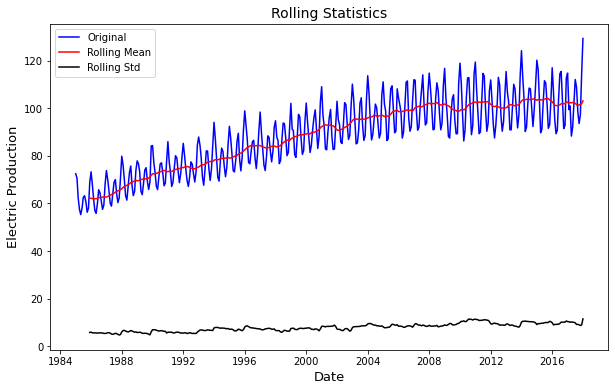

In [8]:
#plot rolling statistics
original_data = plt.plot(df, color="blue", label = "Original")
mean = plt.plot(rolling_mean, color="red", label = "Rolling Mean")
std = plt.plot(rolling_std, color="black", label = "Rolling Std")
plt.xlabel('Date', size= 13)
plt.ylabel('Electric Production', size = 13)
plt.legend(loc = "best")
plt.title("Rolling Statistics", size = 14)
plt.show(block=False)

In [9]:
#Rolling Statistics
from statsmodels.tsa.stattools import adfuller

movingAverage = df.rolling(window=12).mean()
movingSTD = df.rolling(window=12).std()

print(movingAverage,movingSTD )

                 Value
DATE                  
1985-01-01         NaN
1985-02-01         NaN
1985-03-01         NaN
1985-04-01         NaN
1985-05-01         NaN
...                ...
2017-09-01  101.234450
2017-10-01  101.411700
2017-11-01  101.782192
2017-12-01  101.944842
2018-01-01  103.157700

[397 rows x 1 columns]                 Value
DATE                 
1985-01-01        NaN
1985-02-01        NaN
1985-03-01        NaN
1985-04-01        NaN
1985-05-01        NaN
...               ...
2017-09-01   9.155641
2017-10-01   8.968447
2017-11-01   8.671317
2017-12-01   8.911131
2018-01-01  11.454780

[397 rows x 1 columns]


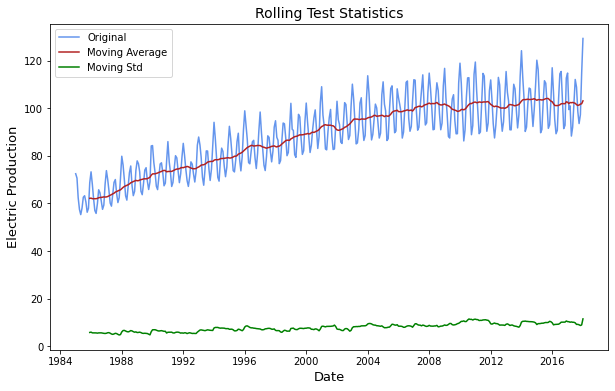

In [10]:
#plot Rolling Statistics 
original_data = plt.plot(df, color="cornflowerblue", label = "Original")
mean = plt.plot(movingAverage, color="firebrick", label = "Moving Average")
std = plt.plot(movingSTD, color="green", label = "Moving Std")
plt.xlabel('Date', size= 13)
plt.ylabel('Electric Production', size = 13)
plt.legend(loc = "best")
plt.title("Rolling Test Statistics", size = 14)
plt.show(block=False)

In [11]:
#perform Dicky-fuller test

print("Results of Dicky-fuller test:")
dftest = adfuller(df, autolag = "AIC")

dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", '#Lags Used',"Number of observations used"])
for key, value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
    
print(dfoutput)

Results of Dicky-fuller test:
Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of observations used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


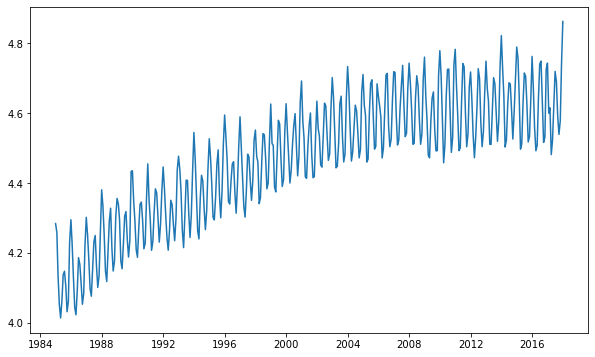

In [12]:
#Estimating Trend
df_logScale = np.log(df)
plt.plot(df_logScale)

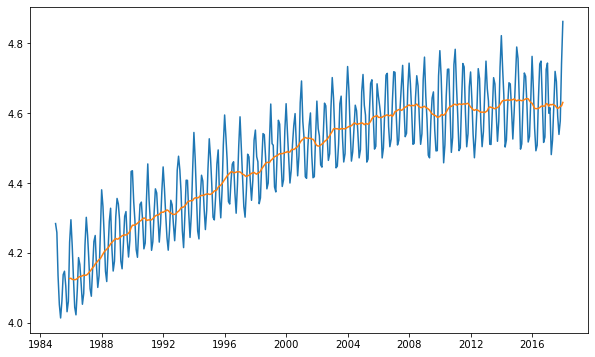

In [13]:
movingAverage = df_logScale.rolling(window=12).mean()
movingSTD = df_logScale.rolling(window=12).std()
plt.plot(df_logScale)
plt.plot(movingAverage)

In [14]:
#Removing Trend with Moving Average
df_log_scaled_ma = df_logScale - movingAverage
df_log_scaled_ma.head()

,Value
DATE,
1985-01-01,NaN
1985-02-01,NaN
1985-03-01,NaN
1985-04-01,NaN
1985-05-01,NaN


In [15]:
#removing NaN values
df_log_scaled_ma.dropna(inplace = True)
df_log_scaled_ma.head()


,Value
DATE,
1985-12-01,0.103961
1986-01-01,0.167724
1986-02-01,0.095629
1986-03-01,0.007329
1986-04-01,-0.079115


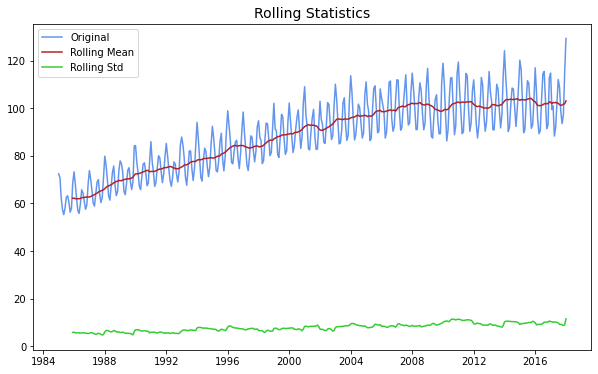

Test Statistic                  -2.256990
p-value                          0.186215
#Lags Used                      15.000000
Number of observations used    381.000000
Critical Value (1%)             -3.447631
Critical Value (5%)             -2.869156
Critical Value (10%)            -2.570827
dtype: float64


In [16]:
def adfuller_test(timeseries, window = 12):
    
    movingAverage = timeseries.rolling(window).mean()
    movingSTD = timeseries.rolling(window).std()
    
    plt.figure(figsize = (10,6))
    orig = plt.plot(timeseries, color='cornflowerblue',label='Original')
    mean = plt.plot(movingAverage, color='firebrick',label='Rolling Mean')
    std = plt.plot(movingSTD, color='limegreen',label='Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling Statistics', size = 14)
    plt.show(block=False)
    
    adf = adfuller(timeseries, autolag='AIC')
    
   
    dfoutput = pd.Series(adf[0:4], index = ["Test Statistic", "p-value", '#Lags Used',"Number of observations used"])
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    
    print(dfoutput)
        
adfuller_test(df, window = 12)

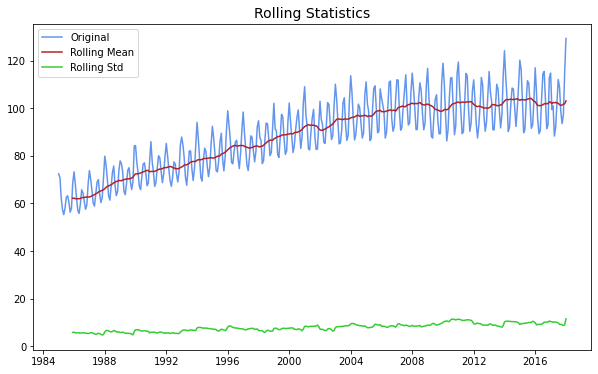

ADF Statistic: -2.257
p-value: 0.186
Critical Values:
1%: -3.448
5%: -2.869
10%: -2.571
ADF > Critical Values
Failed to reject null hypothesis, time series is non-stationary.


In [17]:
def adfuller_test(ts, window = 12):
    
    movingAverage = ts.rolling(window).mean()
    movingSTD = ts.rolling(window).std()
    
    plt.figure(figsize = (10,6))
    orig = plt.plot(ts, color='cornflowerblue',
                    label='Original')
    mean = plt.plot(movingAverage, color='firebrick',
                    label='Rolling Mean')
    std = plt.plot(movingSTD, color='limegreen',
                   label='Rolling Std')
    plt.legend(loc = 'upper left')
    plt.title('Rolling Statistics', size = 14)
    plt.show(block=False)
    
    adf = adfuller(ts, autolag='AIC')
    
    print('ADF Statistic: {}'.format(round(adf[0],3)))
    print('p-value: {}'.format(round(adf[1],3)))
    
    print('Critical Values:')
    
    for key, ts in adf[4].items():
         print('{}: {}'.format(key, round(ts,3)))
   
    
    if adf[0] > adf[4]["5%"]:
        print("ADF > Critical Values")
        print ("Failed to reject null hypothesis, time series is non-stationary.")
    else:
        print("ADF < Critical Values")
        print ("Reject null hypothesis, time series is stationary.")
        
adfuller_test(df, window = 12)

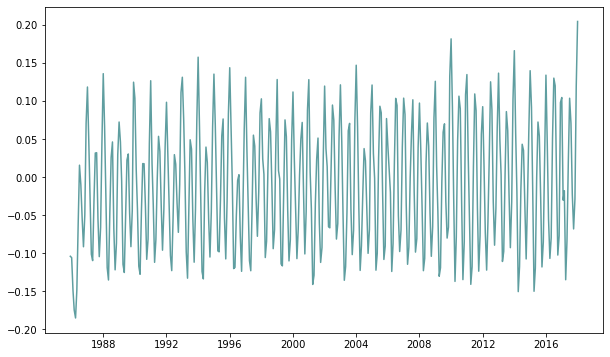

In [18]:
#Exponential Decay Transformation
df_log_scaled_ma_ed = df_log_scaled_ma.ewm(halflife=12, min_periods=0, adjust=True).mean()
df_lsma_sub_df_lsma_ed = df_log_scaled_ma - df_log_scaled_ma_ed

plt.plot(df_lsma_sub_df_lsma_ed - df_log_scaled_ma_ed, color='cadetblue')


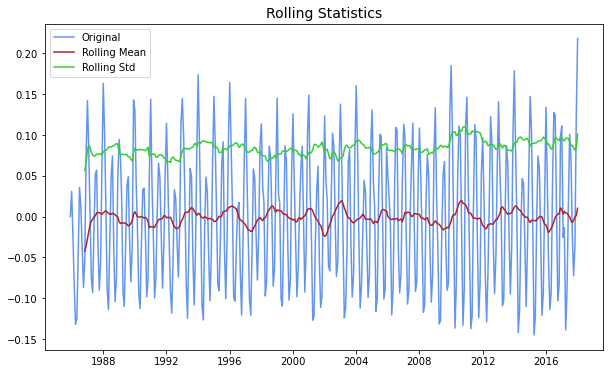

ADF Statistic: -7.213
p-value: 0.0
Critical Values:
1%: -3.448
5%: -2.869
10%: -2.571
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [19]:
adfuller_test(df_lsma_sub_df_lsma_ed)

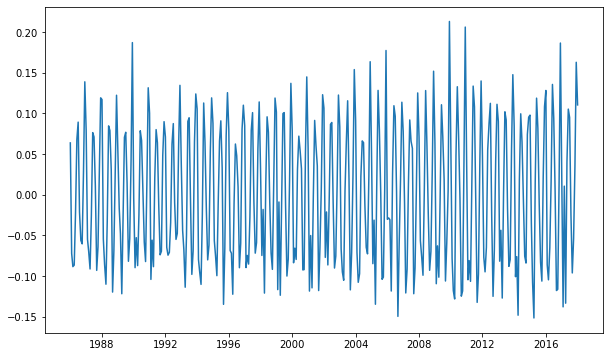

In [20]:
dflogdiffshifting = df_log_scaled_ma - df_log_scaled_ma.shift()
plt.plot(dflogdiffshifting)

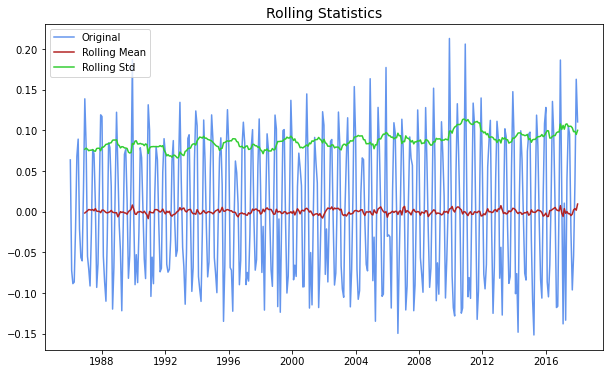

ADF Statistic: -7.651
p-value: 0.0
Critical Values:
1%: -3.448
5%: -2.869
10%: -2.571
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [21]:
dflogdiffshifting.dropna(inplace = True)
adfuller_test(dflogdiffshifting)

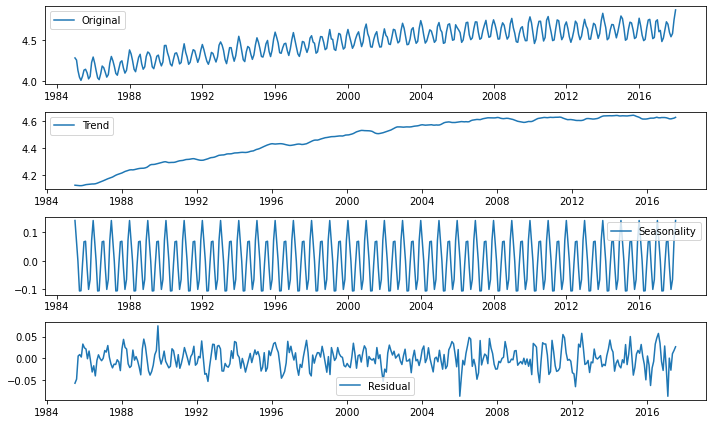

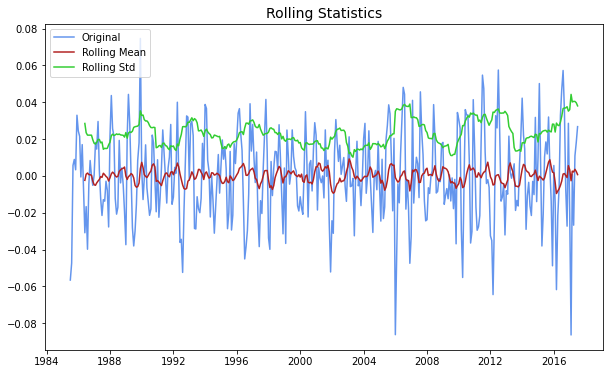

ADF Statistic: -10.003
p-value: 0.0
Critical Values:
1%: -3.448
5%: -2.869
10%: -2.571
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [22]:
#Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_logScale, label = "Original")
plt.legend(loc = "best")
plt.subplot(412)
plt.plot(trend, label = "Trend")
plt.legend(loc = "best")
plt.subplot(413)
plt.plot(seasonal, label = "Seasonality")
plt.legend(loc = "best")
plt.subplot(414)
plt.plot(residual, label = "Residual")
plt.legend(loc = "best")
plt.tight_layout()


decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
adfuller_test(decomposedLogData)


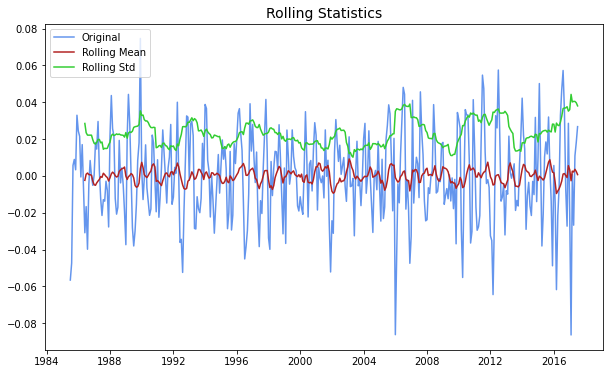

ADF Statistic: -10.003
p-value: 0.0
Critical Values:
1%: -3.448
5%: -2.869
10%: -2.571
ADF < Critical Values
Reject null hypothesis, time series is stationary.


In [23]:
decomposedLogData = residual
decomposedLogData.dropna(inplace = True)
adfuller_test(decomposedLogData)

In [24]:
#rcParams['figure.figsize']=10,8
#df_seasonal_decompose = seasonal_decompose(dflogscaleminusmovingexponentialdecayaverage, model='duplicative')
#df_seasonal_decompose.plot()
#plt.show()

Text(0.5, 1.0, 'Partial Autocorrelation Function')

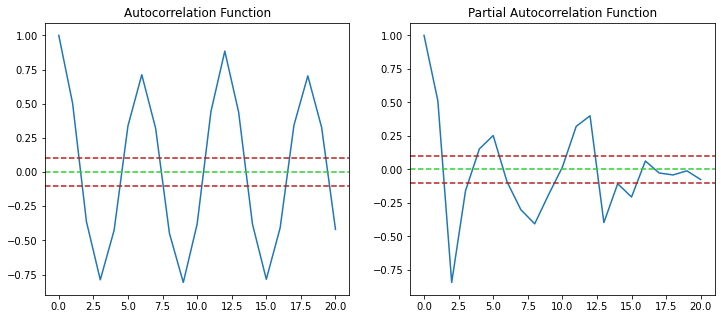

In [25]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(df_lsma_sub_df_lsma_ed, nlags = 20)
lag_pacf = pacf(df_lsma_sub_df_lsma_ed, nlags = 20, method = "ols")

fig, axs = plt.subplots(1, 2, figsize =(12,5))

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='limegreen')
plt.axhline(y=-1.96/np.sqrt(len(df_log_scaled_ma_ed)),linestyle='--', color='firebrick')
plt.axhline(y=1.96/np.sqrt(len(df_log_scaled_ma_ed)),linestyle='--', color='firebrick')
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='limegreen')
plt.axhline(y=-1.96/np.sqrt(len(df_log_scaled_ma_ed)),linestyle='--', color='firebrick')
plt.axhline(y=1.96/np.sqrt(len(df_log_scaled_ma_ed)),linestyle='--', color='firebrick')
plt.title("Partial Autocorrelation Function")

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: nan')

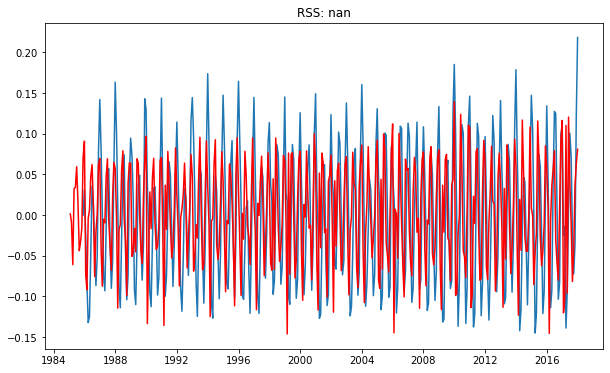

In [33]:
from statsmodels.tsa.arima_model import ARIMA
#AR Model
model = ARIMA(df_logScale, order = (2,1,0))
results_AR = model.fit(disp = 0)
plt.plot(df_lsma_sub_df_lsma_ed)
plt.plot(results_AR.fittedvalues, color = "red")
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues-df_lsma_sub_df_lsma_ed["Value"])**2))

C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\user\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Text(0.5, 1.0, 'RSS: nan')

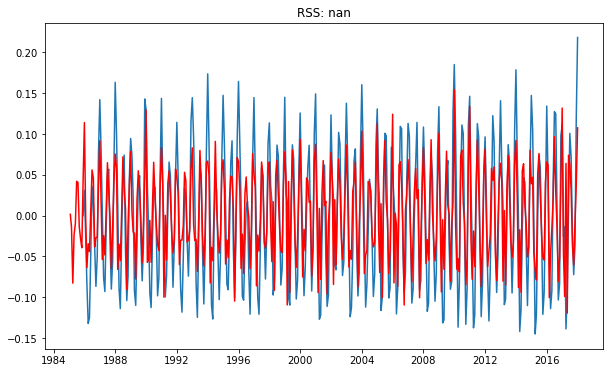

In [34]:
from statsmodels.tsa.arima_model import ARIMA
#MA Model
model = ARIMA(df_logScale, order = (0,1,2))
results_AR = model.fit(disp = 0)
plt.plot(df_lsma_sub_df_lsma_ed)
plt.plot(results_AR.fittedvalues, color = "red")
plt.title("RSS: %.4f"% sum((results_AR.fittedvalues-df_lsma_sub_df_lsma_ed["Value"])**2))

In [35]:
predictions_ARIMA = pd.Series(results_AR.fittedvalues, copy = True)
predictions_ARIMA

DATE
1985-02-01    0.001632
1985-03-01   -0.014049
1985-04-01   -0.082652
1985-05-01   -0.023351
1985-06-01   -0.009649
                ...   
2017-09-01   -0.036623
2017-10-01   -0.060435
2017-11-01   -0.007426
2017-12-01    0.038562
2018-01-01    0.107488
Length: 396, dtype: float64

In [40]:
#convert to cumulative sum
predictions_ARIMA_cumsum = predictions_ARIMA.cumsum()
predictions_ARIMA_cumsum.head()

DATE
1985-02-01    0.001632
1985-03-01   -0.012416
1985-04-01   -0.095068
1985-05-01   -0.118419
1985-06-01   -0.128069
dtype: float64

In [37]:
Predictions_ARIMA_log = pd.Series(df_logScale["Value"], index = df_logScale.index)
Predictions_ARIMA_log = Predictions_ARIMA_log.add(predictions_ARIMA_cumsum, fill_value =0)
Predictions_ARIMA_log.head()

DATE
1985-01-01    4.283658
1985-02-01    4.259682
1985-03-01    4.121953
1985-04-01    3.956219
1985-05-01    3.894626
dtype: float64

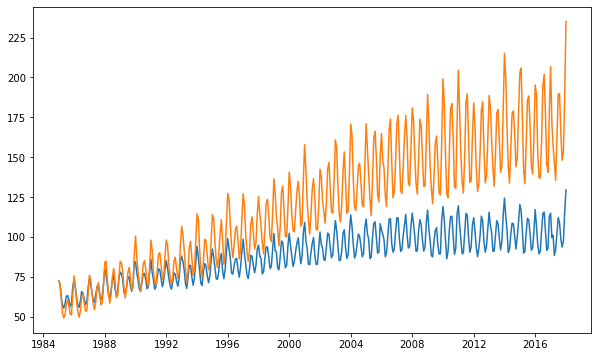

In [38]:
Predictions_ARIMA = np.exp(Predictions_ARIMA_log)
plt.plot(df)
plt.plot(Predictions_ARIMA)

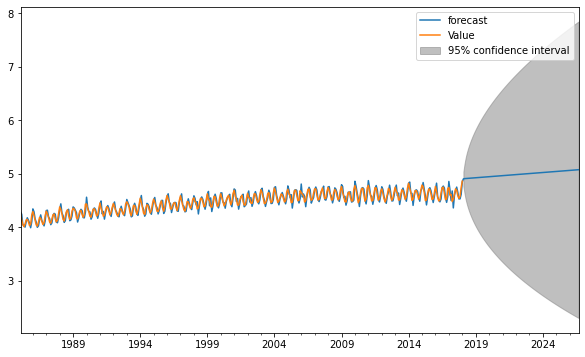

In [39]:
results_AR.plot_predict(1,500)
x=results_AR.forecast(steps=300)